# IBM Employee Attrition Prediction

This paper's objective is to build a classification model that predicts employee attrition. The model will uncover factors that lead to attrition, such as "distance from home to workplace", "marital status", or "monthly income".

The topic is highly important because organizations are confronted with various challenges as a result of employee attrition, including:

*   Decreased productivity;
*   Loss of skilled employees;
*   To sum up, reduced profits.

Original dataset consists of fictional data and provided by IBM on [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

First examine data to better understand how to work with it throughout the paper.

Inspect next questions:

*   How many observations and variables in the dataset?
*   How many missing values?
*   What types of data are we dealing with?
*   What is the output variable and how to interpret it?
*   How balanced is the dataset?




In [48]:
data = pd.read_csv("./input/ibm.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Dataset includes **1470 observations** and **35 variables**:

In [49]:
data.shape

(1470, 35)

**No missing values**:

In [50]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are **only categorical and integer** data types:

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Attrition is a target variable** indicating that an employee has left a job.

Moreover, the dataset is highly **imbalanced**:

In [52]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Data Analysis

Need to carefully study the dataset to find patterns and detect outliers.

In [53]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Counting unique values:

In [54]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

"EmployeeCount", "Over18", "StandardHours" have only one unique values; "EmployeeNumber" has 1470 ones. So this features are useless and should be dropped:

In [55]:
data.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis="columns", inplace=True)

Age range in the dataset is between 18 and 60 with 37 years as mean:

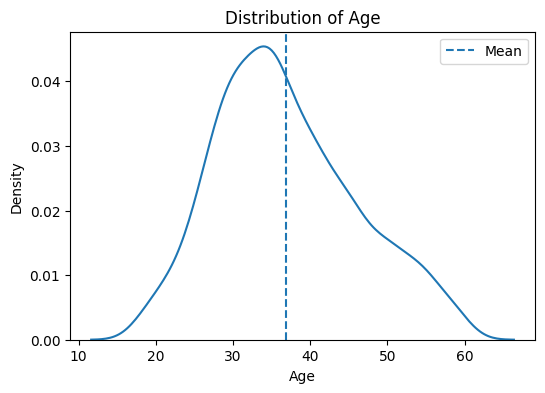

In [73]:
plt.figure(figsize=(6,4))
sns.kdeplot(x=data["Age"])
plt.axvline(x=data["Age"].mean(), linestyle ="--", label="Mean")
plt.legend()
plt.title("Distribution of Age")
plt.show()

Mean monthly salary is about 6500$:

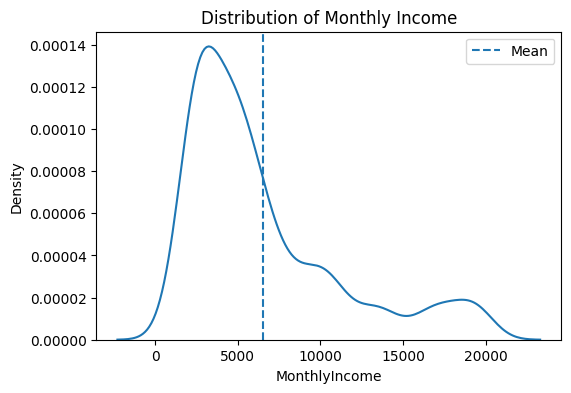

In [74]:
plt.figure(figsize=(6,4))
sns.kdeplot(x=data["MonthlyIncome"])
plt.axvline(x=data["MonthlyIncome"].mean(), linestyle ="--", label="Mean")
plt.legend()
plt.title("Distribution of Monthly Income")
plt.show()

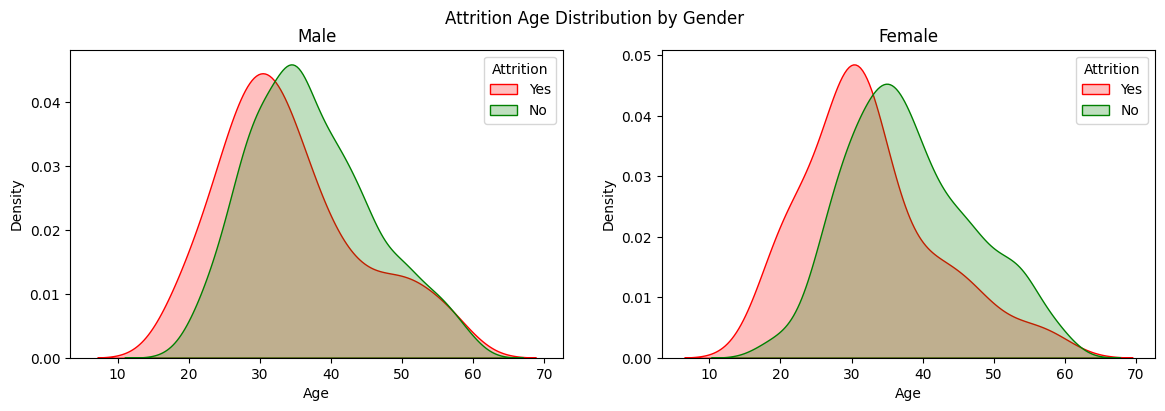

In [85]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,4))
fig.suptitle("Attrition Age Distribution by Gender")
sns.kdeplot(ax=axes[0],x=data[(data["Gender"]=="Male")&(data["Attrition"]=="Yes")]["Age"], color="r", fill=True, label="Yes")
sns.kdeplot(ax=axes[0],x=data[(data["Gender"]=="Male")&(data["Attrition"]=="No")]["Age"], color="g", fill=True, label="No")
axes[0].set_title("Male")
axes[0].legend(title="Attrition")
sns.kdeplot(ax=axes[1],x=data[(data["Gender"]=="Female")&(data["Attrition"]=="Yes")]["Age"], color="r", fill=True, label="Yes")
sns.kdeplot(ax=axes[1],x=data[(data["Gender"]=="Female")&(data["Attrition"]=="No")]["Age"], color="g", fill=True, label="No")
axes[1].set_title("Female")
axes[1].legend(title="Attrition")
plt.show()

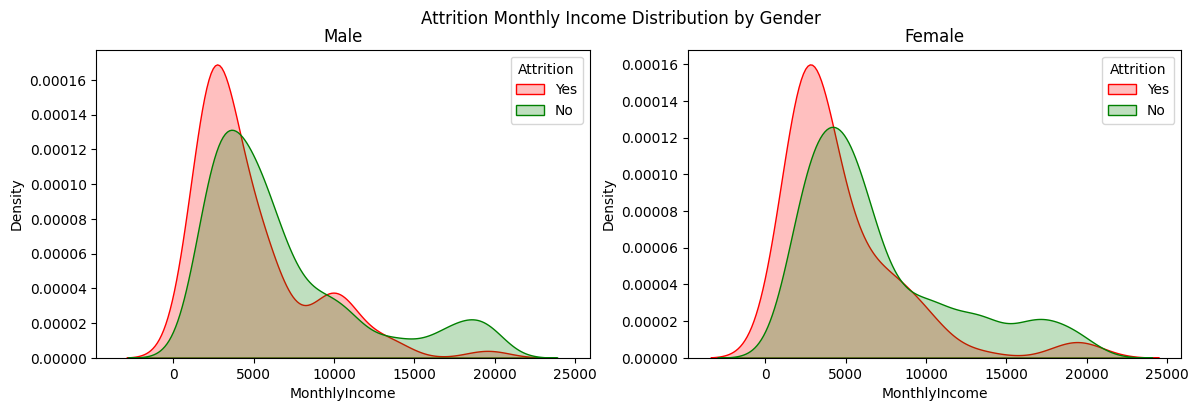

In [84]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,4))
fig.suptitle("Attrition Monthly Income Distribution by Gender")
sns.kdeplot(ax=axes[0],x=data[(data["Gender"]=="Male")&(data["Attrition"]=="Yes")]["MonthlyIncome"], color="r", fill=True, label="Yes")
sns.kdeplot(ax=axes[0],x=data[(data["Gender"]=="Male")&(data["Attrition"]=="No")]["MonthlyIncome"], color="g", fill=True, label="No")
axes[0].set_title("Male")
axes[0].legend(title="Attrition")
sns.kdeplot(ax=axes[1],x=data[(data["Gender"]=="Female")&(data["Attrition"]=="Yes")]["MonthlyIncome"], color="r", fill=True, label="Yes")
sns.kdeplot(ax=axes[1],x=data[(data["Gender"]=="Female")&(data["Attrition"]=="No")]["MonthlyIncome"], color="g", fill=True, label="No")
axes[1].set_title("Female")
axes[1].legend(title="Attrition")
plt.show()

## Data Preprocessing

*To be continued...*